# Decission trees hand-in

Import libraries and functions

In [129]:
import sys
from io import StringIO
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

Load dataset

In [130]:
dataset_path = 'Aleph_dataset.csv'
data = pd.read_csv(dataset_path, index_col = 0)

data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel,isb
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003,0.0
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003,0.0
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003,0.0
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240,0.0
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003,1.0


## Classification task

Train a tree classifier to classify the results from electron-positron collisions into b-quarks and non b-quarks —don’t panic if you don’t know what this means, just think of two categories 0 and 1. In other words, train a decision tree that acts as function mapping a set of input features X to an output Y which represents a binary category.

The column *isb* is the category we want to predict: 0 if it's not a b-quark and 1 if it is a b-quark. Therefore we need to split the loaded data into the rest of feature variables and that column.

In [131]:
feature_columns = data.columns
input_variables = data.columns[feature_columns != 'isb']
input_data      = data[input_variables]
truth           = data['isb']
print(input_variables)

Index(['energy', 'cTheta', 'phi', 'prob_b', 'spheri', 'pt2rel', 'multip',
       'bqvjet', 'ptlrel'],
      dtype='object')


Let's check the data that we are going to feed the tree model to predict the categories:

In [132]:
input_data.head()

,energy,cTheta,phi,prob_b,spheri,pt2rel,multip,bqvjet,ptlrel
0,46.8299,0.3871,0.8528,0.0327,0.2105,0.0302,0.4776,0.0314,-0.0003
1,45.6397,-0.3943,-2.2817,0.0035,0.3457,0.0314,0.3497,0.0106,-0.0003
2,48.8960,-0.4613,-0.6139,0.0649,0.0872,0.0254,0.1288,0.1074,-0.0003
3,39.1577,0.4668,2.4818,0.0027,0.1570,0.0147,0.2732,0.2117,0.0240
4,43.7354,-0.7642,1.7872,0.4320,0.4873,0.0505,0.3536,0.4578,-0.0003


Let us now divide the truth and input_data into two parts; a training sample and a validation sample:

In [133]:
X_train, X_test, y_train, y_test = train_test_split(input_data, truth, test_size=0.2)

#input_train, input_validation, truth_train, truth_validation = train_test_split(input_data, truth, test_size=0.2)

### Hand-in tasks:

1. Define a model `DecisionTreeClassifier`
2. Fit it the data
3. For the trained model, print the model prediction score on the validation split 
4. Display importance of each input feature to the predictions using `feature_importances_`  attribute
5. Plot the decission surface over the top two features
6. Generate the confusion matrix, ROC curve and AUC value of the trained model using `sklearn.metrics.confusion_matrix`, `sklearn.metrics.roc_curve` and `sklearn.metrics.auc`
7. Try to improve the performance of the model by choosing differnt model parameters.
8. *Bonus* : Explore how the model parameters `max_depth`  and `min_samples_leaf` affects the overfitting of the model.
9. *Bonus* : Display the decision `tree.plot_tree(model, max_depth=2)` up to sensible depth and inspect it

In [134]:
# 1. Define a model

clf = DecisionTreeClassifier(random_state=0)

# 2. Fit it the data
clf = clf.fit(X_train, y_train)

# 3. For the trained model, print the model prediction score on the validation split
y_pred = clf.predict(X_test)

# 4. Display importance of each input feature to the predictions using feature_importances_ attribute
sorted_features = sorted(zip(input_data.columns, clf.feature_importances_), key=lambda x: x[1], reverse=True)

for name, importance in sorted_features:
    print(name, importance)

top_features = [name for name, _ in sorted_features[:2]]
top_features

prob_b 0.5008001767774642
bqvjet 0.11132332418701404
energy 0.06559456686984498
pt2rel 0.06419155264059927
spheri 0.06078359526518303
cTheta 0.0526717940450663
multip 0.052483345206806455
phi 0.051954719855236385
ptlrel 0.04019692515278531


['prob_b', 'bqvjet']

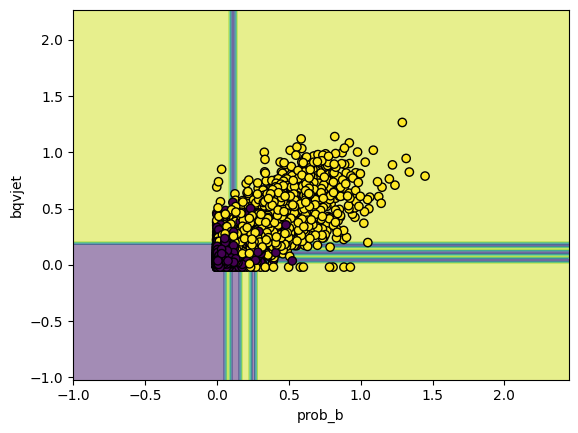

In [135]:
# 5. Plot the decision surface over the top two features
from sklearn.inspection import DecisionBoundaryDisplay

input_data_top2 = input_data[top_features]

clf_top = DecisionTreeClassifier(random_state=0)

X_train_top, y_train_top = X_train[top_features], y_train

clf_top = clf_top.fit(X_train_top, y_train_top)

display=DecisionBoundaryDisplay.from_estimator(
    clf_top, X_train[top_features], response_method="predict",
    alpha=0.5
)

plt.scatter(
    x=X_train[top_features[0]],
    y=X_train[top_features[1]],
    c=y_train,
    edgecolor="black"
)

In [136]:
# from sklearn.metrics import roc_curve, auc, confusion_matrix

# 6. Generate the confusion matrix, ROC curve and AUC value of the trained model using
# sklearn.metrics.confusion_matrix, sklearn.metrics.roc_curve and sklearn.metrics.auc

y_pred_top = clf_top.predict(X_test[top_features])
print('Confusion Matrix\n', confusion_matrix(y_test, y_pred_top))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_top)
roc_auc = auc(fpr, tpr)
print('ROC AUC Score\n', roc_auc)


Confusion Matrix
 [[4665  588]
 [ 546  995]]
ROC AUC Score
 0.7668742919129182


In [146]:
clf_2 = DecisionTreeClassifier(max_depth=7)
clf_2.fit(X_train, y_train)
print(clf_2.score(X_test, y_test))

0.8963791580806594


In [148]:
# 9. Bonus : Display the decision tree.plot_tree(model, max_depth=2) up to sensible depth and inspect it

<function matplotlib.pyplot.show(close=None, block=None)>

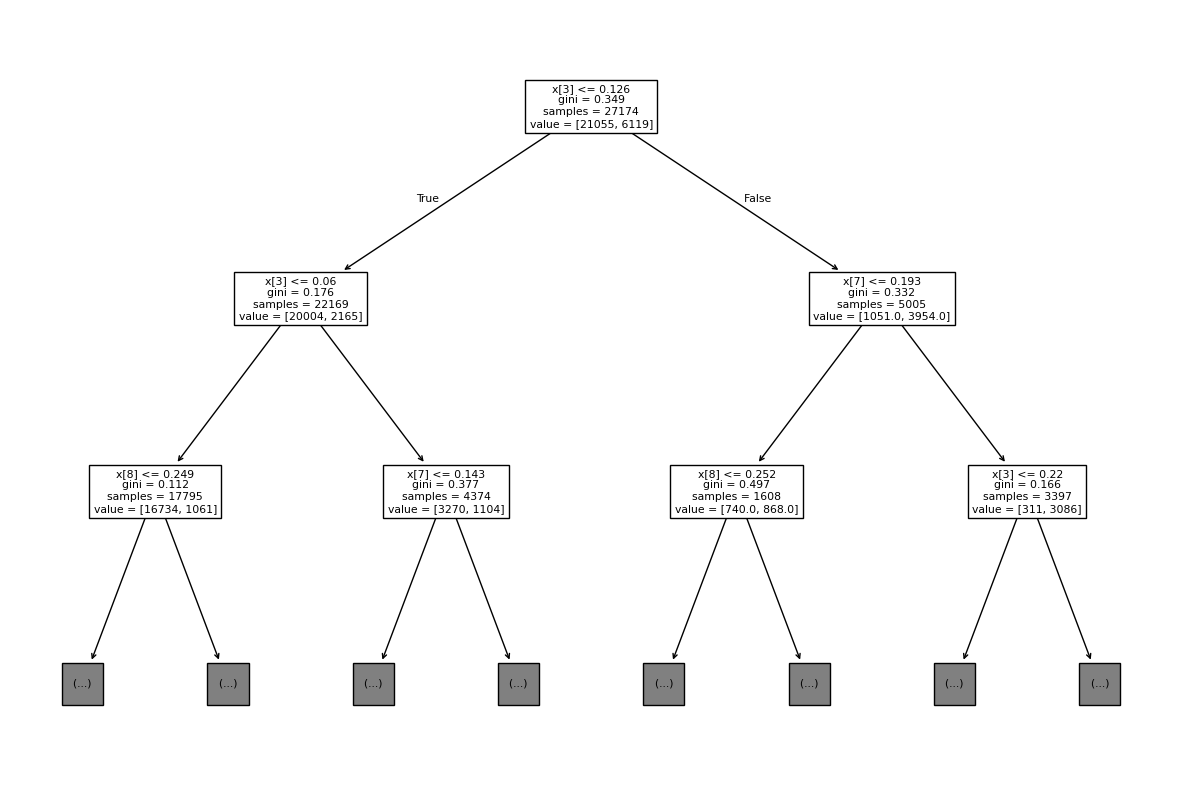

In [154]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf_2, max_depth=2)
plt.show

## Regression task

The goal of the regression task is to predict the energy of each particles collision based on the variables.

### Hand-in tasks:

1. Define a regression tree model using `DecisionTreeRegressor` and fit it to predict the energy of the collions
3. For the trained model, visualise the model predictions vs the real values and print the obtained loss
4. Report importance of each feature using `feature_importances_`  attribute  
5. Evaluate your model on a loop for different max_depths and figure out what's the optimal depth to obtained the best accuracy on the validation data.
6. Do a sanity-check of your model by train a regression with very high depth and evaluate it on the training dataset split: you should obtained a score of 1.0 and see a perfectly diagonal line when ploting real values vs predictions.
7. *Bonus*: Try to improve the performance of the model on the validation split by choosing different model parameters (if you're familiar with it, feel free to use k-fold Cross-Validation)
8. *Bonus*: Predict two any features —e.g. energy and another one— based on the rest. [Here you can find an example of Multi-output ree regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression_multioutput.html#sphx-glr-auto-examples-tree-plot-tree-regression-multioutput-py).

In [187]:
# 1. Define a regression tree model using DecisionTreeRegressor 
# and fit it to predict the energy of the collions

X_train, X_test, y_train, y_test = train_test_split(input_data, truth, test_size=0.2)

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


loss:  0.1473358846040624
score:  0.1579307226290101


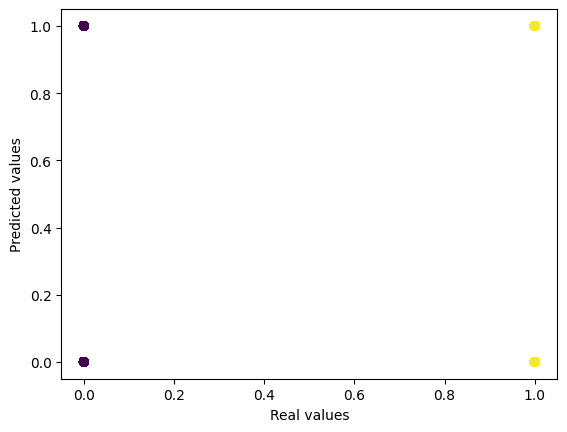

In [191]:
# 2. For the trained model, visualise the model predictions vs the real values
# and print the obtained loss

y_pred_reg = regressor.predict(X_test)
loss = np.mean((y_test - y_pred_reg)**2)
print('loss: ', loss)
score = regressor.score(X_test, y_test)
print('score: ', score)

plt.scatter(y_test, y_pred_reg, c=y_test)
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.show()

In [192]:
# 3. Report importance of each feature using feature_importances_ attribute

sorted_features = sorted(zip(input_data.columns, regressor.feature_importances_), key=lambda x: x[1], reverse=True)

for name, importance in sorted_features:
    print(name, importance)

top_features = [name for name, _ in sorted_features[:2]]
top_features

prob_b 0.5058799042183588
bqvjet 0.10877009876225155
energy 0.06396372817713628
spheri 0.059952574972987734
cTheta 0.057654503172006065
pt2rel 0.054648690923851335
phi 0.05323712337083145
multip 0.05270301887486297
ptlrel 0.04319035752771358


['prob_b', 'bqvjet']

In [208]:
# 4. Evaluate your model on a loop for different max_depths and figure out 
# what's the optimal depth to obtained the best accuracy on the validation data.

max_range = 10
opt_depth = 0
opt_score = 0

for i in range(1, max_range):
    max_depth = i
    print('Running ' + str(i) + '/' + str(max_range))
    regressor_i = DecisionTreeRegressor(random_state=0, max_depth=max_depth)
    regressor_i.fit(X_train, y_train)
    score = regressor_i.score(X_test, y_test)
    if score > opt_score:
        opt_score = score
        opt_depth = max_depth
        print('New best score found: ', opt_score)
        print('max_depth = ', max_depth)

    print('completed.')
    print('')


Running 1/10
New best score found:  0.41282402442537414
max_depth =  1
completed.

Running 2/10
New best score found:  0.4807529538550225
max_depth =  2
completed.

Running 3/10
New best score found:  0.5103068490683121
max_depth =  3
completed.

Running 4/10
New best score found:  0.5312275223885949
max_depth =  4
completed.

Running 5/10
New best score found:  0.5428879367984815
max_depth =  5
completed.

Running 6/10
completed.

Running 7/10
completed.

Running 8/10
completed.

Running 9/10
completed.



In [209]:
# 5. Do a sanity-check of your model by train a regression with very high depth
# and evaluate it on the training dataset split:
# you should obtained a score of 1.0 and see a perfectly diagonal line when ploting real values vs predictions.

In [227]:
regressor_min = DecisionTreeRegressor(random_state=0, max_depth=1)
regressor_min.fit(X_train, y_train)
print('min training score: ', regressor_min.score(X_train, y_train))
print('min testing score: ', regressor_min.score(X_test, y_test))

regressor_max = DecisionTreeRegressor(random_state=0)
regressor_max.fit(X_train, y_train)
print('max training score: ', regressor_max.score(X_train, y_train))
print('max training score: ', regressor_max.score(X_test, y_test))


min training score:  0.41677142792832744
min testing score:  0.41282402442537414
max training score:  1.0
max training score:  0.1579307226290101
